Plant Disease Detection

github repo: https://github.com/SkyDocs/Plant-Disease-Detection

In [1]:
import tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

import numpy as np

In [2]:
train_ds = image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",image_size=(256, 256))
valid_ds = image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",image_size=(256, 256))

class_names = train_ds.class_names


rescale = Rescaling(scale=1.0/255)
train_ds = train_ds.map(lambda image,label:(rescale(image),label))
valid_ds  = valid_ds.map(lambda image,label:(rescale(image),label))

Found 33123 files belonging to 18 classes.
Found 8280 files belonging to 18 classes.


In [3]:
model = keras.Sequential()

In [4]:
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(18,activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [6]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [7]:
history = model.fit(train_ds, validation_data = valid_ds,epochs = 10, batch_size=1)

Epoch 1/10
1036/1036 [==============================] - 359s 341ms/step - loss: 1.3918 - accuracy: 0.5442 - val_loss: 0.4261 - val_accuracy: 0.8607
Epoch 2/10
1036/1036 [==============================] - 351s 338ms/step - loss: 0.3338 - accuracy: 0.8906 - val_loss: 0.1796 - val_accuracy: 0.9405
Epoch 3/10
1036/1036 [==============================] - 351s 338ms/step - loss: 0.1956 - accuracy: 0.9374 - val_loss: 0.1458 - val_accuracy: 0.9533
Epoch 4/10
1036/1036 [==============================] - 363s 350ms/step - loss: 0.1392 - accuracy: 0.9531 - val_loss: 0.1176 - val_accuracy: 0.9632
Epoch 5/10
1036/1036 [==============================] - 351s 338ms/step - loss: 0.0974 - accuracy: 0.9681 - val_loss: 0.1133 - val_accuracy: 0.9622
Epoch 6/10
1036/1036 [==============================] - 350s 338ms/step - loss: 0.0836 - accuracy: 0.9726 - val_loss: 0.1020 - val_accuracy: 0.9671
Epoch 7/10
1036/1036 [==============================] - 350s 338ms/step - loss: 0.0643 - accuracy: 0.9793 - val_

In [8]:
model.save('model04.h5')

In [9]:
result = model.evaluate(valid_ds)

259/259 [==============================] - 31s 118ms/step - loss: 0.0871 - accuracy: 0.9749


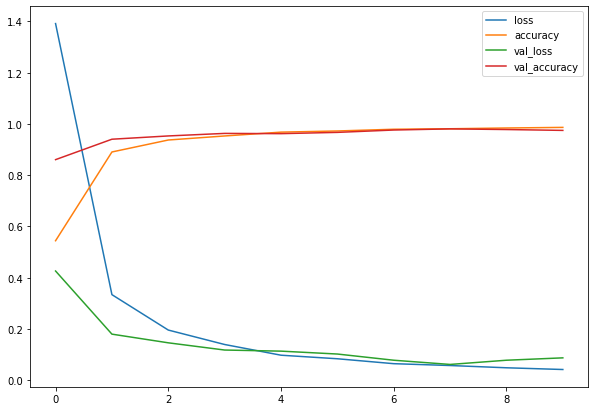

In [10]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [11]:
class_names

['Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy']